### وارد کردن کتابخانه‌ها
در این بخش، کتابخانه‌های لازم برای پردازش تصویر و نمایش داده‌ها را وارد می‌کنیم:
- `numpy` برای کار با آرایه‌های چندبعدی.
- `cv2` برای پردازش تصویر و اعمال فیلترها.
- `matplotlib.pyplot` برای نمایش تصاویر در یک گرید گرافیکی.

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### بارگذاری تصویر اصلی
در این بخش، تصویر اصلی از مسیر مشخص شده بارگذاری می‌شود.  
از تابع `cv.imread()` برای خواندن تصویر استفاده می‌کنیم، و تصویر به صورت یک آرایه چندبعدی ذخیره می‌شود تا بتوانیم پردازش‌های لازم را روی آن انجام دهیم.

In [43]:
# Load the original image
image = cv.imread('../src/corner.png')

### تبدیل تصویر به خاکستری
در این بخش، تصویر رنگی اصلی به یک تصویر خاکستری تبدیل می‌شود.  
تابع `cv.cvtColor()` فضای رنگی تصویر را به خاکستری تغییر می‌دهد، که موجب ساده‌تر شدن پردازش تصویر و کاهش حجم محاسبات می‌شود.

In [44]:
# Convert the original image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

### شناسایی گوشه‌ها با روش هریس
در این بخش، الگوریتم شناسایی گوشه‌ی "هریس" برای یافتن گوشه‌ها در تصویر خاکستری اعمال می‌شود.  
تابع `cv.cornerHarris()` گوشه‌های تصویر را شناسایی کرده و میزان شدت گوشه‌ای را در هر نقطه محاسبه می‌کند. پارامترهای `blockSize`، `ksize` و `k` مشخص‌کننده تنظیمات مختلف این الگوریتم هستند.

In [45]:
# Detect corners in the grayscale image using the Harris corner detection method
harris_corners = cv.cornerHarris(gray_image, blockSize=10, ksize=3, k=0.04)

### بسط دادن گوشه‌ها
در این بخش، گوشه‌های شناسایی‌شده را با استفاده از تابع `cv.dilate()` بسط می‌دهیم تا واضح‌تر و بهتر دیده شوند.  
این عملیات باعث می‌شود که نقاط گوشه‌ای شناسایی‌شده در تصویر، برجسته‌تر به نظر برسند و در مرحله‌ی بعد بتوانیم به راحتی آن‌ها را روی تصویر اصلی نمایش دهیم.

In [46]:
# Dilate corner points to make them more visible
dilated_corners = cv.dilate(harris_corners, None)

### برجسته‌سازی گوشه‌ها روی تصویر اصلی
در این بخش، نقاط گوشه‌ای شناسایی شده روی تصویر اصلی برجسته می‌شوند.  
در اینجا با استفاده از شرط `dilated_corners > 0.01 * dilated_corners.max()`، نقاطی که شدت گوشه‌ای بالایی دارند به رنگ قرمز (`[255, 0, 0]`) تغییر داده می‌شوند تا بهتر در تصویر قابل مشاهده باشند.

In [47]:
# Highlight the detected corners on the original image (in red color)
image[dilated_corners > 0.01 * dilated_corners.max()] = [255, 0, 0]

### نمایش تصویر نهایی
در این بخش، تصویر نهایی که شامل گوشه‌های برجسته شده است نمایش داده می‌شود.  
از `plt.imshow()` برای نمایش تصویر و از `plt.title()` برای افزودن عنوان به آن استفاده شده است. عنوان نمایش، "Detected Corners" است که نشان‌دهنده گوشه‌های شناسایی‌شده می‌باشد.

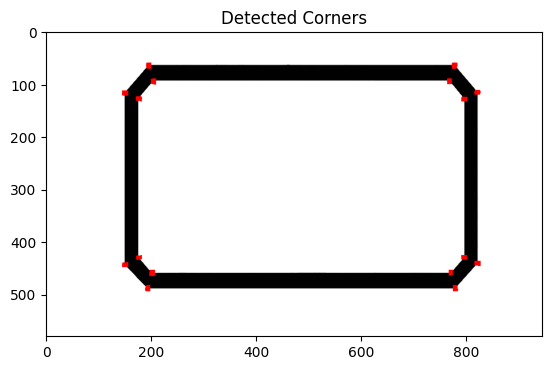

In [48]:
# Display the resulting image with highlighted corners
plt.imshow(image)
plt.title('Detected Corners')
plt.show()